In [2]:
# import required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt

import json
from datetime import datetime

from time import sleep

from random import randint

# set the directory for the data
data_dir = '../Resources'

ny_vehicle_regestrations_file = 'Vehicle__Snowmobile__and_Boat_Registrations.csv'
# ny_vehicle_regestrations_file = 'Vehicle_and_Boat_Registrations_by_Fuel_Type_per_County_20240510.csv'

ny_vehcile_regestrations_df = pd.read_csv(os.path.join(data_dir, ny_vehicle_regestrations_file))

ny_vehcile_regestrations_df.head()




C:\Users\Tim\AppData\Local\Temp\ipykernel_54844\2549760269.py:19: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  ny_vehcile_regestrations_df = pd.read_csv(os.path.join(data_dir, ny_vehicle_regestrations_file))


,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,925,PSD,NEW YORK CITY,NY,10007,NEW YORK,1972.0,INTER,SN/P,GAS,4009.0,NaN,NaN,12/01/1972,NaN,YW,N,N,N
1,VEH,4H302459,PSD,SYRACUSE,NY,13202,ONONDAGA,1961.0,BUICK,4DSD,GAS,4129.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N
2,VEH,3B31H138446,PSD,SINCLAIRVILLE,NY,0,CHAUTAUQUA,1973.0,FORD,4DSD,GAS,3693.0,NaN,NaN,12/01/1972,NaN,GL,N,N,N
3,VEH,2D29M3G108024,PSD,HENRIETTA,NY,14467,MONROE,1973.0,PONTI,4DSD,GAS,4014.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N
4,VEH,12861,PSD,LEXINGTON,NY,12452,GREENE,1972.0,OSHKO,SN/P,DIESEL,42000.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N


In [20]:
# ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
# ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])
ny_vehcile_regestrations_df.loc[
    (ny_vehcile_regestrations_df['Reg Valid Date'] >= '2016') 
    & (ny_vehcile_regestrations_df['Reg Valid Date'] <= '2019')
][['Reg Valid Date', 'Reg Expiration Date']]


,Reg Valid Date,Reg Expiration Date
89915,2016-01-04,2018-01-03
89916,2016-01-04,2018-01-03
89917,2016-01-04,2018-01-03
89918,2016-01-04,2018-01-03
89919,2016-01-04,2018-01-03
...,...,...
130566,2018-12-31,2020-12-30
130567,2018-12-31,2020-12-30
130568,2018-12-31,2020-12-30
130569,2018-12-31,2020-12-30


In [31]:
ny_vehcile_regestrations_df['regesterd_year'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date']).dt.year

<Axes: xlabel='regesterd_year'>

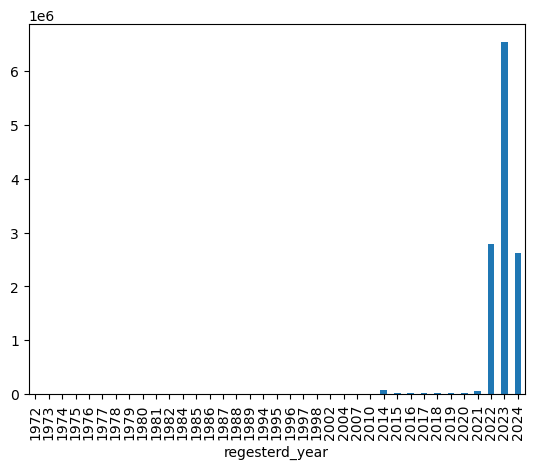

In [32]:
ny_vehcile_regestrations_df['regesterd_year'].value_counts().sort_index().plot(kind='bar')

In [19]:
ny_vehcile_regestrations_df['Reg Expiration Date'] = ny_vehcile_regestrations_df['Reg Expiration Date'].fillna(ny_vehcile_regestrations_df['Reg Valid Date'] + pd.DateOffset(years=2) - pd.DateOffset(days=1))

In [21]:
ny_vehcile_regestrations_df['Record Type'].value_counts()

Record Type
VEH     11137186
TRL       626817
BOAT      334345
SNOW       79126
Name: count, dtype: int64

In [22]:
ny_car_df = ny_vehcile_regestrations_df[ny_vehcile_regestrations_df['Record Type'] == 'VEH']
ny_car_df.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,925,PSD,NEW YORK CITY,NY,10007,NEW YORK,1972.0,INTER,SN/P,GAS,4009.0,NaN,NaN,1972-12-01,1974-11-30,YW,N,N,N
1,VEH,4H302459,PSD,SYRACUSE,NY,13202,ONONDAGA,1961.0,BUICK,4DSD,GAS,4129.0,NaN,NaN,1972-12-01,1974-11-30,RD,N,N,N
2,VEH,3B31H138446,PSD,SINCLAIRVILLE,NY,0,CHAUTAUQUA,1973.0,FORD,4DSD,GAS,3693.0,NaN,NaN,1972-12-01,1974-11-30,GL,N,N,N
3,VEH,2D29M3G108024,PSD,HENRIETTA,NY,14467,MONROE,1973.0,PONTI,4DSD,GAS,4014.0,NaN,NaN,1972-12-01,1974-11-30,RD,N,N,N
4,VEH,12861,PSD,LEXINGTON,NY,12452,GREENE,1972.0,OSHKO,SN/P,DIESEL,42000.0,NaN,NaN,1972-12-01,1974-11-30,RD,N,N,N


In [23]:
ny_car_df['Fuel Type'].value_counts()

Fuel Type
GAS         10474592
DIESEL        473996
ELECTRIC      133728
NONE           29648
FLEX           19385
COMP N/G        3098
OTHER           1815
PROPANE          924
Name: count, dtype: int64

In [24]:
ny_car_df['Reg Valid Date'].min()

Timestamp('1972-12-01 00:00:00')

In [25]:
brooklyn_cars = ny_car_df.loc[ny_car_df['City'] == 'BROOKLYN']

In [26]:
brooklyn_cars['Fuel Type'].value_counts()

Fuel Type
GAS         508896
DIESEL       17025
ELECTRIC      9307
FLEX           509
NONE           441
OTHER          378
COMP N/G        57
PROPANE         22
Name: count, dtype: int64

In [27]:
# group brooklyn cars on VIN to get full Registration dates
brooklyn_cars = brooklyn_cars.dropna(subset=['VIN'])

brooklyn_vin_group = brooklyn_cars.groupby('VIN').agg({'Reg Valid Date': 'min', 'Reg Expiration Date': 'max', 'Fuel Type': 'first'})

brooklyn_vin_group['Reg Valid Date'] = pd.to_datetime(brooklyn_vin_group['Reg Valid Date'])
brooklyn_vin_group['Reg Expiration Date'] = pd.to_datetime(brooklyn_vin_group['Reg Expiration Date'])

start_year = 2018
end_year = 2021

# brooklyn_vin_group = brooklyn_vin_group[
#     (brooklyn_vin_group['Reg Valid Date'].dt.year <= end_year)
#     & (brooklyn_vin_group['Reg Expiration Date'].dt.year >= start_year) 
# ]

# brooklyn_vin_group['Fuel Type'].value_counts()
brooklyn_vin_group

,Reg Valid Date,Reg Expiration Date,Fuel Type
VIN,,,
00000009114102724,2023-11-09,2025-12-22,GAS
0000000PY32757031,2023-10-26,2025-10-29,GAS
00006544,2023-11-27,2024-12-31,GAS
00006715,2023-10-23,2024-12-31,GAS
00006720,2023-11-01,2024-12-31,DIESEL
...,...,...,...
ZZ1A87124DK185590,2024-04-30,2025-04-30,GAS
ZZ1A88123DK185523,2024-04-30,2025-04-30,GAS
ZZ1A94124AK179067,2024-04-15,2025-04-30,GAS


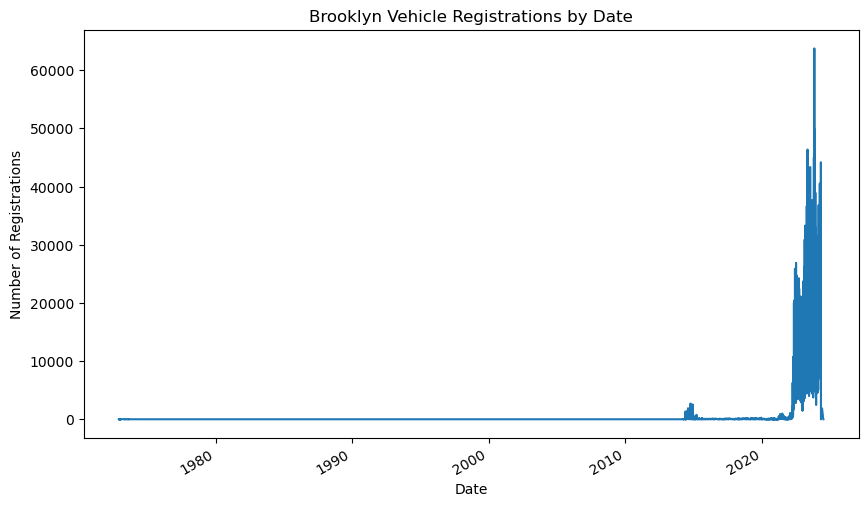

In [30]:
# plot the number of registrations by fuel type by date
ny_vehcile_regestrations_df['Reg Valid Date'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Brooklyn Vehicle Registrations by Date')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.show()

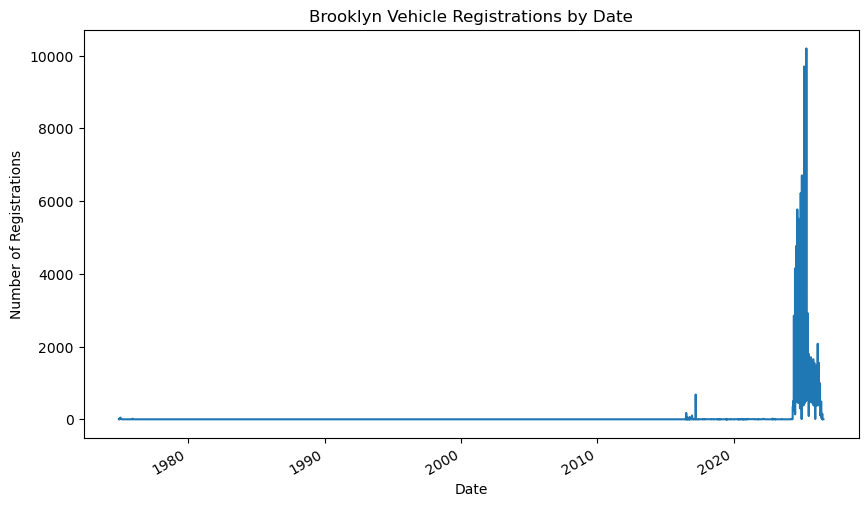

In [29]:
# plot the number of registrations by fuel type by date
brooklyn_vin_group['Reg Expiration Date'].value_counts().sort_index().plot(kind='line', figsize=(10, 6))
plt.title('Brooklyn Vehicle Registrations by Date')
plt.xlabel('Date')
plt.ylabel('Number of Registrations')
plt.show()